# 演習課題3

9章(Tensorflow を使ったテキストデータの分類)の分類器を Keras で実装してください。

- 「ベクタライズした結果をロードする」以降のコードをテキストからコピーして、その続きを作ってください。
- テキストにしたがって、隠れ層2層(1層目200ノード、2層目100ノード)のニューラルネットワークを作ってください。


In [1]:
import numpy as np
Z = np.load('vectorize_result_all3.npz',allow_pickle=True)
X = Z['arr_0']
print(len(X[0]))
labels = np.load('labels3.npy',allow_pickle=True)
fnames = np.load('fnames3.npy',allow_pickle=True)

7020


In [2]:
train_t = labels.reshape([len(X), 1])

# 正解ラベルの　OneHot化
from sklearn.preprocessing import OneHotEncoder

# encode label
# encoder = OneHotEncoder(n_values=max(train_t)+1)
encoder = OneHotEncoder()

train_y= encoder.fit_transform(train_t).toarray()
print(train_y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
model = Sequential()

input_n = len(X[0])

model.add(
    Dense(units=200,
         input_shape=(input_n,),
         activation='relu',
         kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(
    Dense(units=100,
         activation='relu',
         kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(
    Dense(units=9,
         activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

### 訓練データとテストデータに分割

In [4]:
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_y = train_test_split(X, train_y, train_size=0.75, random_state=1)

### 学習

In [5]:
from tensorflow.keras.callbacks import TensorBoard

history=model.fit(
    X_train,
    y_train,
    batch_size=20,
    epochs=50,
    validation_split=0.2,
    verbose=1,
    shuffle=True,
)

Epoch 1/50
221/221 [==============================] - 3s 11ms/step - loss: 2.7506 - accuracy: 0.7353 - val_loss: 1.6536 - val_accuracy: 0.9176
Epoch 2/50
221/221 [==============================] - 2s 11ms/step - loss: 1.4937 - accuracy: 0.9061 - val_loss: 1.2972 - val_accuracy: 0.9240
Epoch 3/50
221/221 [==============================] - 2s 10ms/step - loss: 1.1541 - accuracy: 0.9387 - val_loss: 1.0882 - val_accuracy: 0.9294
Epoch 4/50
221/221 [==============================] - 2s 10ms/step - loss: 1.0411 - accuracy: 0.9369 - val_loss: 1.0776 - val_accuracy: 0.9222
Epoch 5/50
221/221 [==============================] - 2s 10ms/step - loss: 0.9595 - accuracy: 0.9428 - val_loss: 1.0540 - val_accuracy: 0.9213
Epoch 6/50
221/221 [==============================] - 2s 10ms/step - loss: 0.9453 - accuracy: 0.9443 - val_loss: 1.0665 - val_accuracy: 0.9195
Epoch 7/50
221/221 [==============================] - 2s 11ms/step - loss: 0.9383 - accuracy: 0.9459 - val_loss: 0.9814 - val_accuracy: 0.9285

#### 結果確認

In [6]:
# モデルの評価
score = model.evaluate(test_x, test_y, verbose=1)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


58/58 [==============================] - 0s 4ms/step - loss: 1.0450 - accuracy: 0.9278

Test score: 1.0450093746185303
Test accuracy: 0.9277958869934082


<AxesSubplot:>

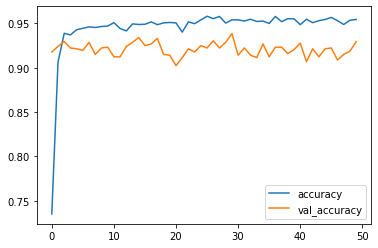

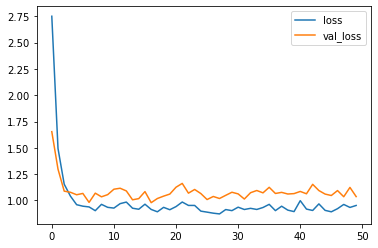

In [7]:
import pandas as pd

pd.DataFrame({'accuracy': history.history['accuracy'],
              'val_accuracy': history.history['val_accuracy']}).plot()
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot()

テストデータを分類して、結果を確認してみる。

In [8]:
pred = model.predict(test_x)

In [9]:
LABEL_NAME = ['dokujo-tsushin', 'it-life-hack','kaden-channel', 
             'livedoor-homme', 'movie-enter', 'peachy','smax',
             'sports-watch', 'topic-news']

In [10]:
# ファイルの最初だけ返す
def file_contents(fname):
    with open(fname, 'r') as f:
        contents = ''.join(f.readlines()[2:])
    return contents[:50]   # 最初の50文字だけ

In [11]:
ok = 0
ng = 0

for i, p in enumerate(pred):
    pred_label = p.argmax()
    answer_label = test_y[i].argmax()
    if pred_label != answer_label:
        ng += 1
        # 予測を間違えたものだけ表示
        print(fnames[i])
        print('True:', LABEL_NAME[answer_label], '  Predicted:', LABEL_NAME[pred_label])
        print(file_contents(fnames[i]))
        print()
    else:
        ok += 1

print("OK:", ok, "  NG:", ng, " Accuracy:{:.4}".format(ok/(ok + ng)))

testdata/text/dokujo-tsushin/dokujo-tsushin-5474199.txt
True: sports-watch   Predicted: kaden-channel
マスクで顔を隠す独女たち
東京・渋谷のセンター街でマスク姿の10〜30代の男女100人にアンケート調

testdata/text/dokujo-tsushin/dokujo-tsushin-5451872.txt
True: peachy   Predicted: dokujo-tsushin
梅村ゆずの結婚どころじゃないんですっ！　Presented by ゆるっとcafe　
みなさまはじめ

testdata/text/dokujo-tsushin/dokujo-tsushin-4905611.txt
True: it-life-hack   Predicted: sports-watch
女どうしでもなかなか聞けない！ アンダーヘア、どうしてる？
「体の不調が出やすくなる年齢だけに、同世

testdata/text/dokujo-tsushin/dokujo-tsushin-5359084.txt
True: livedoor-homme   Predicted: kaden-channel
何故、女は韓国に魅了されるのか？ Presented by ゆるっとcafe
どうも！　はじめまして

testdata/text/dokujo-tsushin/dokujo-tsushin-6048111.txt
True: kaden-channel   Predicted: it-life-hack
元カレ発見！ 過去の恋が蘇るFacebookの恐怖
最近、また一段とFacebookユーザーが急増し

testdata/text/dokujo-tsushin/dokujo-tsushin-5162916.txt
True: topic-news   Predicted: livedoor-homme
あなたがお局と呼ばれる理由
化粧品メーカーの派遣社員の歩さん（23歳）の職場は50代の主任と20代後

testdata/text/dokujo-tsushin/dokujo-tsushin-6831866.txt
True: livedoor-homme   Pr